# First Steps with Feedback Control

**WARNING:** Some cells in this notebook are not meant to be run sequentially!

In [1]:
import sys
sys.path.append('..')

In [2]:
%matplotlib inline  
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
import time

In [3]:
from ctrl.linear import Gain, PID, Feedback
from ctrl.logger import Logger
#from ctrl.bbb.

Substitute `HOST` and `PORT` with the IP address and port of your controller:

In [4]:
from ctrl.client import Controller
HOST, PORT = "192.168.10.102", 9999
controller = Controller(host = HOST, port = PORT)

In [ ]:
controller.add_sink('logger', Logger(), ['clock', 'encoder1'])

In [ ]:
controller.set_sink('logger','inputs', ['clock', 'encoder1','motor1'])
print(controller.info('all'))

In [5]:
Kp = -0.34*100
num = np.array([Kp])
den = np.array([1])
pmax = math.pi/2
umin = 25
controller.set_controller1(DeadZoneCompensation(LTI(num, den, None, pmax),umin,.1))
print('K = {:5.3f}, vmax = {:5.3f}'.format(Kp,pmax))

In [6]:
preference = 0
controller.reset_logger()
controller.set_encoder1(0)
with controller:
    controller.set_reference1(preference)
    time.sleep(10)
log = controller.get_log()

> Controller with 4 signal(s), 3 source(s), 2 sink(s), and 0 filter(s)
> period = 0.01s
> signals
  1. encoder1
  2. pot1
  3. motor1
  4. clock
> sources
  1. clock[enabled] >> clock
  2. encoder1[enabled] >> encoder1
  3. pot1[enabled] >> pot1
> filters
> sinks
  1. motor1 >> motor1[enabled]
  2. clock, encoder1, motor1 >> logger[enabled]



In [8]:
t = log[:,0]
position = log[:,1]
reference = log[:,2]
control = log[:,3]
velocity = np.zeros(t.shape, float)
velocity[1:] = (position[1:]-position[:-1])/(t[1:]-t[:-1])

duty cycle = 5%

In [9]:
control2 = control.copy()
ind = np.where((control2 > -umin) & (control2 < umin))
print(ind[0].shape, control2.shape)
control2[ind] = 0
ind = np.where(control2 > umin)
control2[ind] = control2[ind] - umin
ind = np.where(control < -umin)
control2[ind] = control2[ind] + umin

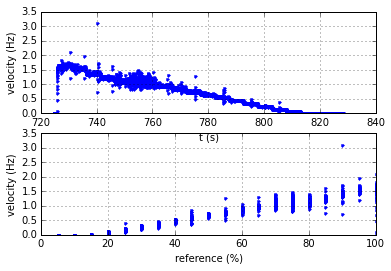

In [10]:
plt.subplot(3,1,1)
plt.plot(t, position, '.')
plt.xlabel('t (s)')
plt.ylabel('position (cycles)')
plt.grid()

plt.subplot(3,1,2)
plt.plot(t, velocity, '.')
plt.xlabel('t (s)')
plt.ylabel('velocity (%)')
plt.grid()

plt.subplot(3,1,3)
plt.plot(t, control, '.')
plt.xlabel('t (s)')
plt.ylabel('control (%)')
plt.grid()

In [11]:
plt.plot(t, control2, 'b.', t, 100*position, 'r.')
plt.xlabel('t (s)')
plt.ylabel('control (%)')
plt.grid()
plt.xlim(2,7)

a = 0.019, v0 = 16.613
